This notebook takes the (thought) experiments from [Looking Glass Universe's awesome video about the many worlds](https://www.youtube.com/watch?v=xBlpOGdk-0U) and runs them as circuits on an IBM quantum computer.

The simulated results agree with experimental ones :)  
(except for a little bit of noise)

In [1]:
import numpy as np
from qiskit import QuantumCircuit, BasicAer, execute

# helper function
sim_backend = BasicAer.get_backend('qasm_simulator')
def simulate(qc, shots=1024):
    return execute(qc, backend=sim_backend, shots=shots).result().get_counts()

## Interference

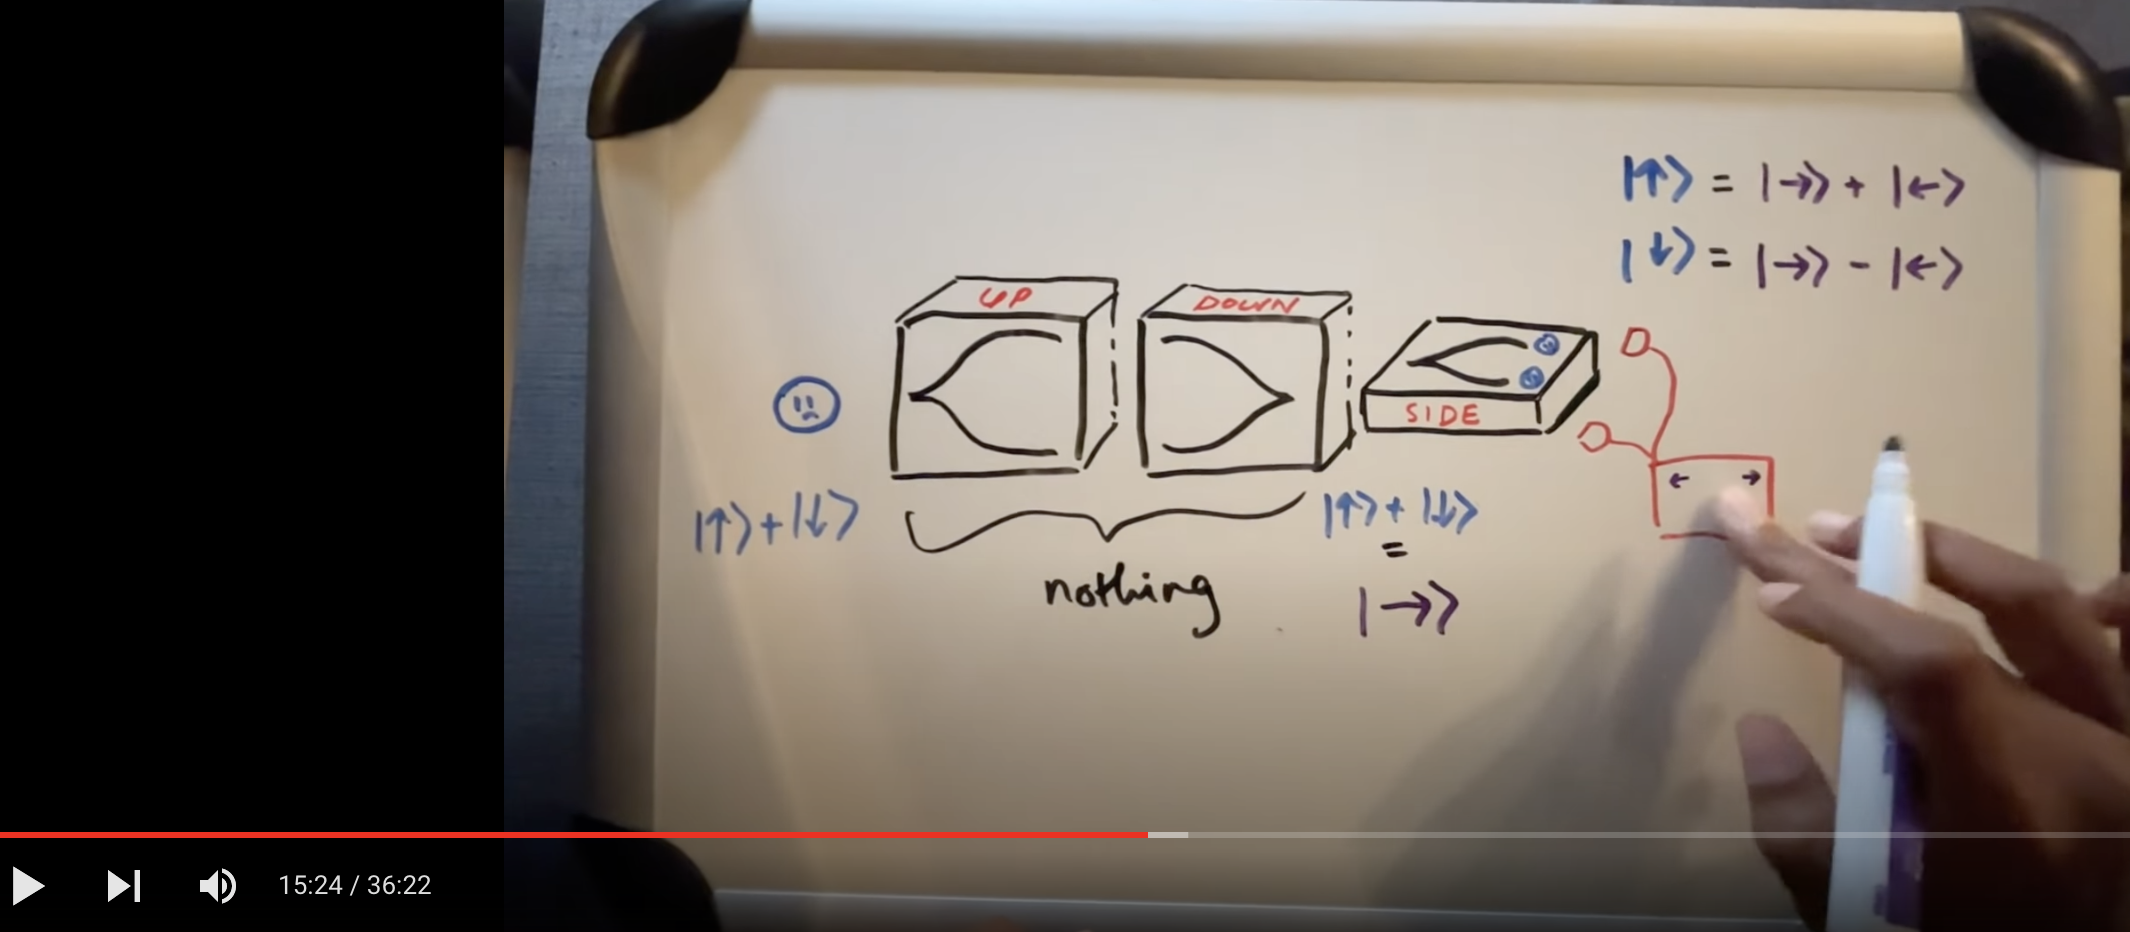

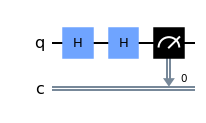

In [2]:
circ_no_measure = QuantumCircuit(1, 1)
circ_no_measure.h(0)
circ_no_measure.h(0)
circ_no_measure.measure(0, 0)
circ_no_measure.draw(output='mpl')

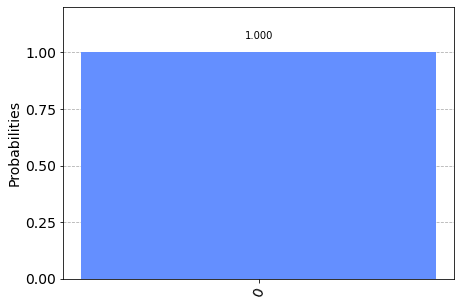

In [3]:
from qiskit.visualization import plot_histogram
plot_histogram(simulate(circ_no_measure))

## Mid-circuit measurement

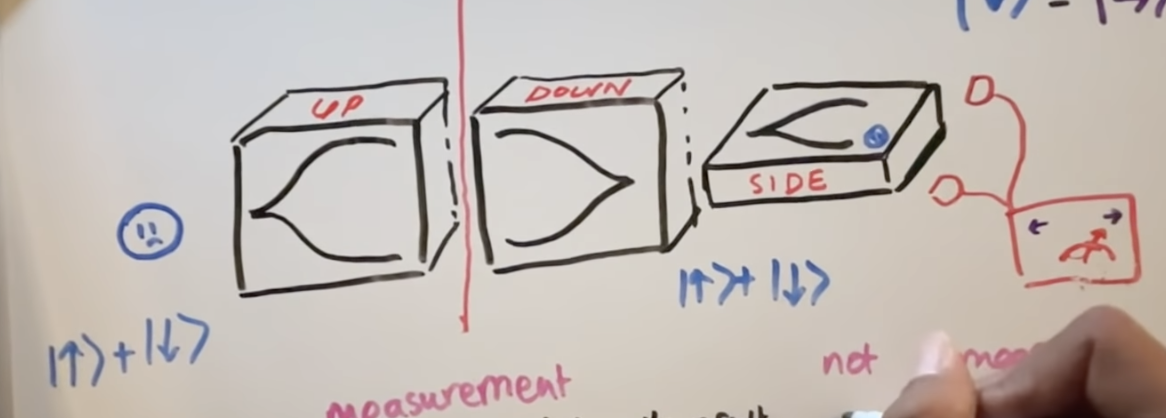

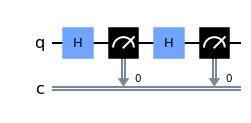

In [4]:
circ_mid_measure = QuantumCircuit(1, 1)
circ_mid_measure.h(0)
circ_mid_measure.measure(0, 0)
circ_mid_measure.h(0)
circ_mid_measure.measure(0, 0)
circ_mid_measure.draw(output='mpl')

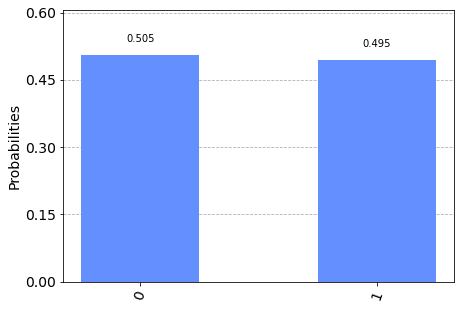

In [5]:
plot_histogram(simulate(circ_mid_measure))

## Fake measurement

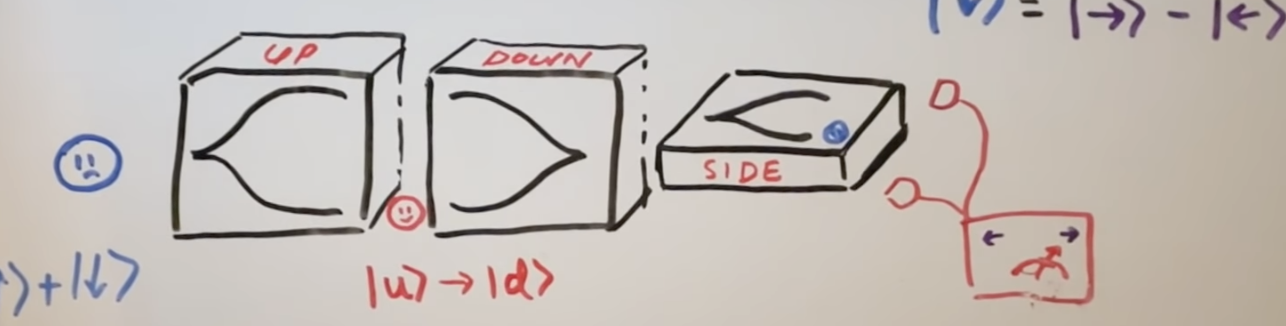

(do a cnot on a different qubit and dont measure it)

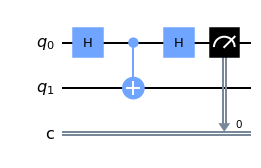

In [6]:
circ_fake_measure = QuantumCircuit(2, 1)
circ_fake_measure.h(0)
circ_fake_measure.cnot(0, 1)
circ_fake_measure.h(0)
circ_fake_measure.measure(0, 0)
circ_fake_measure.draw(output='mpl')

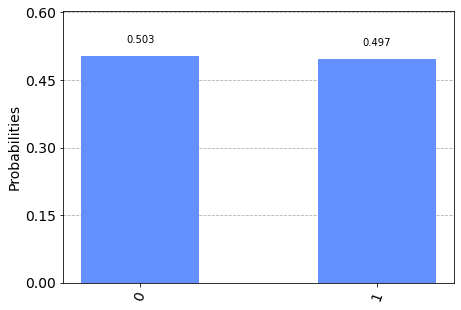

In [7]:
plot_histogram(simulate(circ_fake_measure))

## Undo entanglement

Do another CNOT to undo the entanglement so the cnot noise of the fake measurement is comparable with something

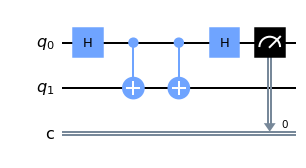

In [8]:
circ_undo_measure = QuantumCircuit(2, 1)
circ_undo_measure.h(0)
circ_undo_measure.cnot(0, 1)
circ_undo_measure.cnot(0, 1)

circ_undo_measure.h(0)
circ_undo_measure.measure(0, 0)
circ_undo_measure.draw(output='mpl')

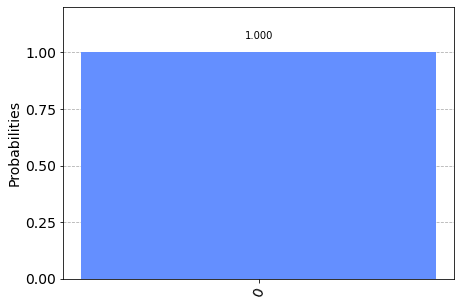

In [9]:
plot_histogram(simulate(circ_undo_measure))

### Real devices

In [10]:
from qiskit import QuantumCircuit, IBMQ, transpile
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account()
real_backend = provider.get_backend('ibmq_manila')

circs = [circ_no_measure, circ_mid_measure, circ_fake_measure, circ_undo_measure]
circs = transpile(circs, backend=real_backend, optimization_level=0) # no optimization

job_manager = IBMQJobManager()
print("running jobs ..")
results = job_manager.run(circs, backend=real_backend, shots=8192).results()
print("done")

running jobs ..
done


In [11]:
for i in range(4):
    counts = results.get_counts(i)
    print("counts of ", i, " = ", counts)

counts of  0  =  {'0': 8059, '1': 133}
counts of  1  =  {'0': 4153, '1': 4039}
counts of  2  =  {'0': 4073, '1': 4119}
counts of  3  =  {'0': 7905, '1': 287}


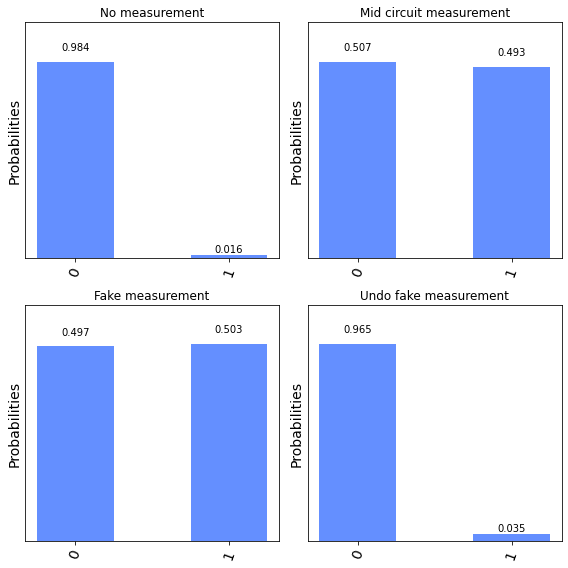

In [40]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(8, 8))


plot_histogram(results.get_counts(0), ax=axs[0, 0])

plot_histogram(results.get_counts(1), ax=axs[0, 1])

plot_histogram(results.get_counts(2), ax=axs[1, 0])

plot_histogram(results.get_counts(3), ax=axs[1, 1])

ax_list = np.array(axs).flatten()
titles = ["No measurement", "Mid circuit measurement", "Fake measurement", "Undo fake measurement"]
for i in range(4):
    ax_list[i].set_title(titles[i])
    ax_list[i].set_yticks([], minor=False)
    ax_list[i].set_yticklabels([], fontdict=None, minor=False)
    

fig.tight_layout()

So losing track of q1 is indistinguishable to measurement!